In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [3]:
x = np.linspace(0,100,10000)
pump = np.sin(1/4*x)

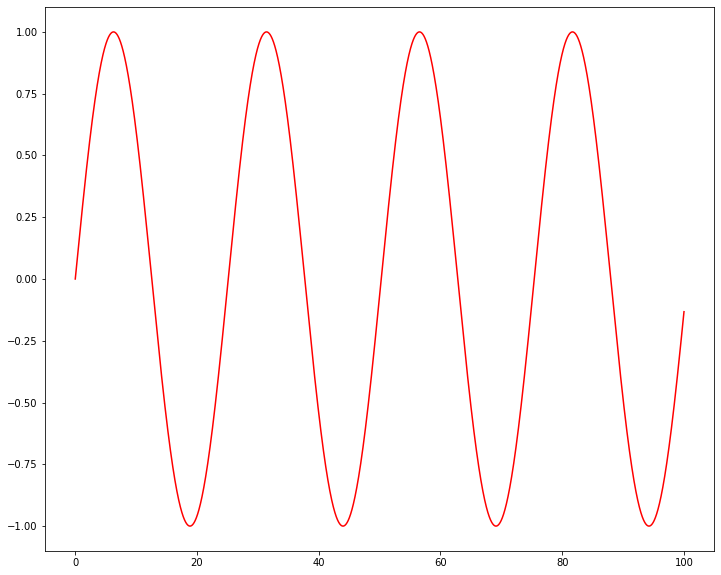

In [4]:
plt.figure(figsize=(12,10))
plt.plot(x, pump, color='r')
plt.show()

In [5]:
def MyHanningTaper(sig,ptap):
    #Take a signal and taper its edges to zero 
    #with ptap being the percentage of the signal over which the taper will be applied
    
    nt=np.size(sig)
    tlen=int(nt*ptap/100.)
    
    tap1=np.hanning(2*tlen)
    
    tap2=np.ones_like(sig)
    tap2[:tlen]=tap1[:tlen]
    tap2[-tlen:]=tap1[-tlen:]
    sig2=tap2*sig
    
    return sig2

In [6]:
pump_tap1 = MyHanningTaper(pump,30)

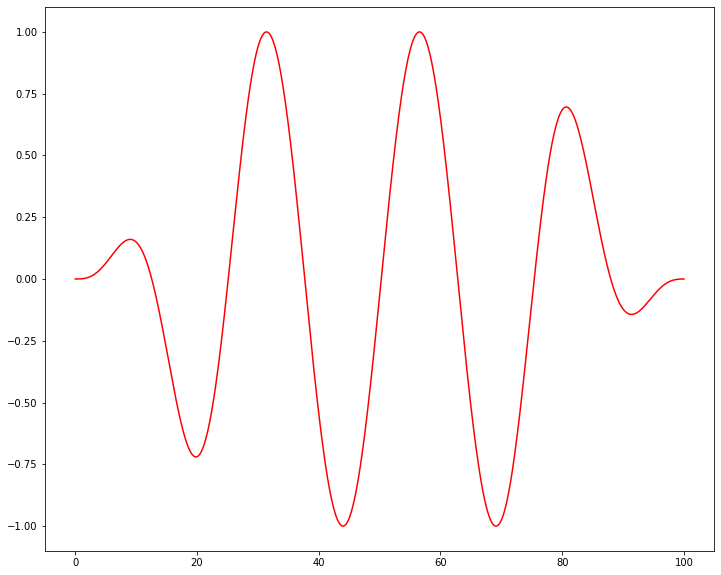

In [7]:
plt.figure(figsize=(12,10))
plt.plot(x, pump_tap1, color='r')
plt.show()

In [8]:
pump_fin = np.pad(pump_tap1, 1000)
print(len(pump_fin))
x = np.linspace(0,100,len(pump_fin))

12000


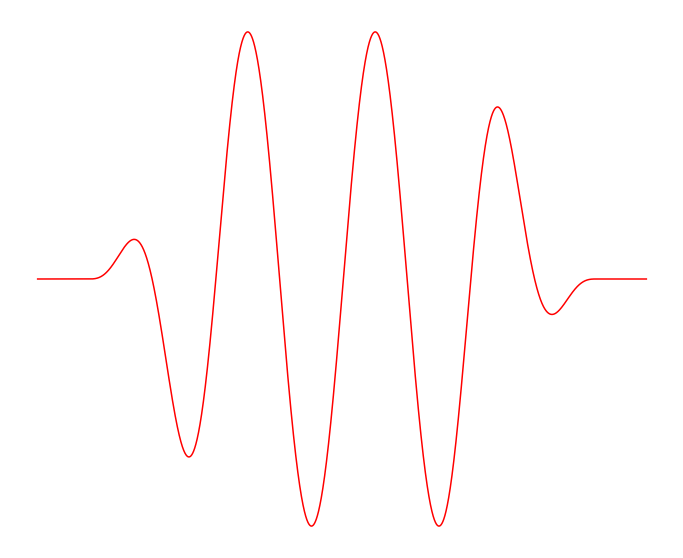

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
plt.plot(x, pump_fin, color='r')
ax.set_axis_off()
plt.show()


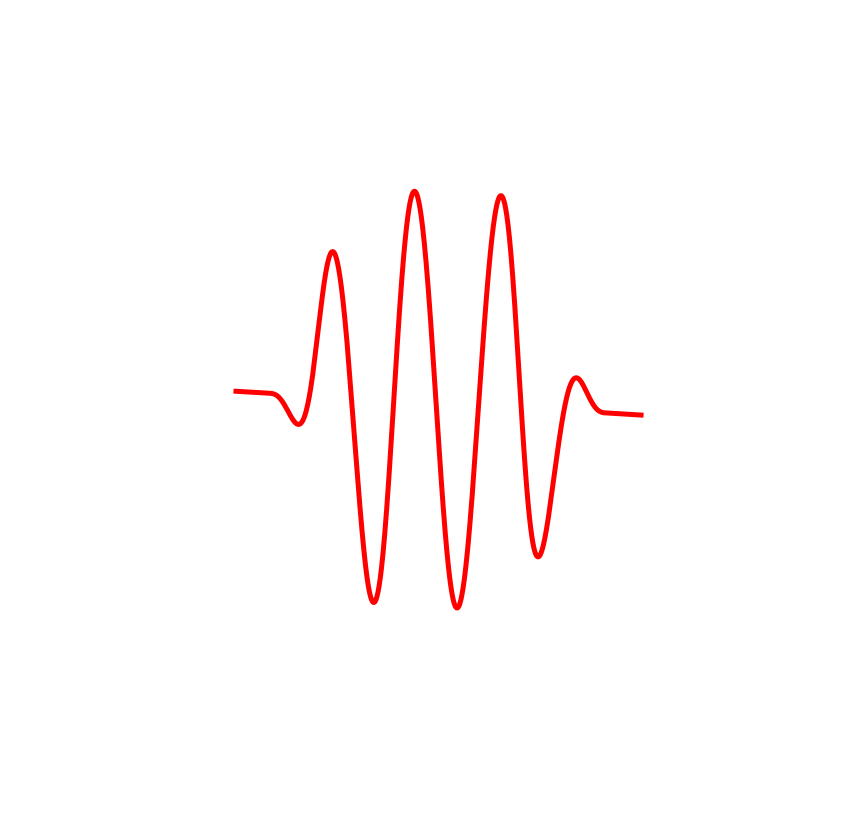

In [14]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_axis_off()
ax.plot(xs=x, ys=pump_fin, zs=0, zdir='y', color='r', linewidth=5)
ax.view_init(20, 100)